In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

In [2]:
df = pd.read_csv('/content/Student Mental health.csv')
df.head(2)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No


In [3]:
df.shape

(101, 11)

In [4]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [5]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

In [7]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [8]:
df.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [9]:
df['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [10]:
df['Year'] = df['Year'].apply(lambda x : int(x.split(' ')[-1]))
df['Year'].unique()

array([1, 2, 3, 4])

In [11]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [12]:
df.head(3)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [13]:
df['CGPA'] = df['CGPA'].apply(lambda x : x.strip())
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [14]:
Course_List = df['Course'].unique().tolist()
print(len(Course_List))

df['Course'].unique()

49


array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [15]:
course_dic = {'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' ,
              'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe',
              'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'}

df['Course'].replace(course_dic,inplace=True)

In [16]:
len(df['Course'].unique().tolist())

37

In [17]:
df.sample(5)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
32,8/7/2020 14:29,Male,19.0,BCS,1,3.50 - 4.00,No,No,No,Yes,No
66,8/7/2020 18:10,Female,18.0,KOE,3,3.00 - 3.49,No,No,Yes,No,No
80,13/07/2020 10:11:26,Female,24.0,Communication,2,3.50 - 4.00,Yes,Yes,Yes,Yes,No
82,13/07/2020 10:12:26,Female,19.0,Engineering,1,3.00 - 3.49,No,Yes,Yes,No,No


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Date_Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['Gender'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['Course'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['CGPA'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Age', 'Year']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_9, *['Date_Time', 'Gender'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_10, *['Gender', 'Course'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['Course', 'CGPA'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_12, *['CGPA', 'Marital_Status'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['Age', 'Date_Time'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['Age', 'Gender'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['Age', 'Course'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_16, *['Age', 'CGPA'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['Date_Time', 'Age', 'Date_Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_18, *['Date_Time', 'Age', 'Gender'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_19, *['Date_Time', 'Age', 'Course'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_20, *['Date_Time', 'Age', 'CGPA'], **{})
chart

In [18]:
df['Course'].value_counts()

Engineering                20
BCS                        18
IT                         11
Biomedical science          4
KOE                         4
Law                         3
BENL                        3
Irkhs                       3
Psychology                  3
Pendidikan Islam            2
Fiqh                        2
Koe                         2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Diploma Nursing             1
Biotechnology               1
Communication               1
Econs                       1
Pendidikan Islam            1
Radiography                 1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
ENM                         1
Accounting                  1
KENMS     

In [19]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [21]:
df['Anxiety'].value_counts()

No     67
Yes    34
Name: Anxiety, dtype: int64

In [23]:
print(" No Anxiety \n")
print(df[df['Anxiety']=='No']['Course'].value_counts().nlargest(5))
print("\n Anxiety \n")
print(df[df['Anxiety']=='Yes']['Course'].value_counts().nlargest(5))

 No Anxiety 

Engineering           16
BCS                   12
Biomedical science     4
IT                     3
BENL                   2
Name: Course, dtype: int64

 Anxiety 

IT             8
BCS            6
Engineering    4
Koe            2
KOE            2
Name: Course, dtype: int64


In [24]:
df[['Anxiety','Gender']].groupby('Gender')['Anxiety'].value_counts()

Gender  Anxiety
Female  No         51
        Yes        24
Male    No         16
        Yes        10
Name: Anxiety, dtype: int64

In [25]:
Anx = df[df['Anxiety']=='Yes']['Course'].unique().tolist()
No_Anx = df[df['Anxiety']=='No']['Course'].unique().tolist()


set1 = set(No_Anx)
set2 = set(Anx)

print(list(sorted(set1 - set2)))

['ALA', 'Accounting ', 'Banking Studies', 'Biomedical science', 'Biotechnology', 'Business Administration', 'CTS', 'DIPLOMA TESL', 'Diploma Nursing', 'Fiqh', 'Human Resources', 'Human Sciences ', 'MHSC', 'Malcom', 'Mathemathics', 'Nursing ', 'Pendidikan Islam', 'Pendidikan Islam ', 'Radiography', 'TAASL', 'Usuluddin ']


In [26]:
df['Depression'].value_counts()

No     66
Yes    35
Name: Depression, dtype: int64

In [30]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [31]:
df[['Gender','Depression']].value_counts()

Gender  Depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
dtype: int64

Text(0.5, 1.0, 'Course vs Panic_Attack')

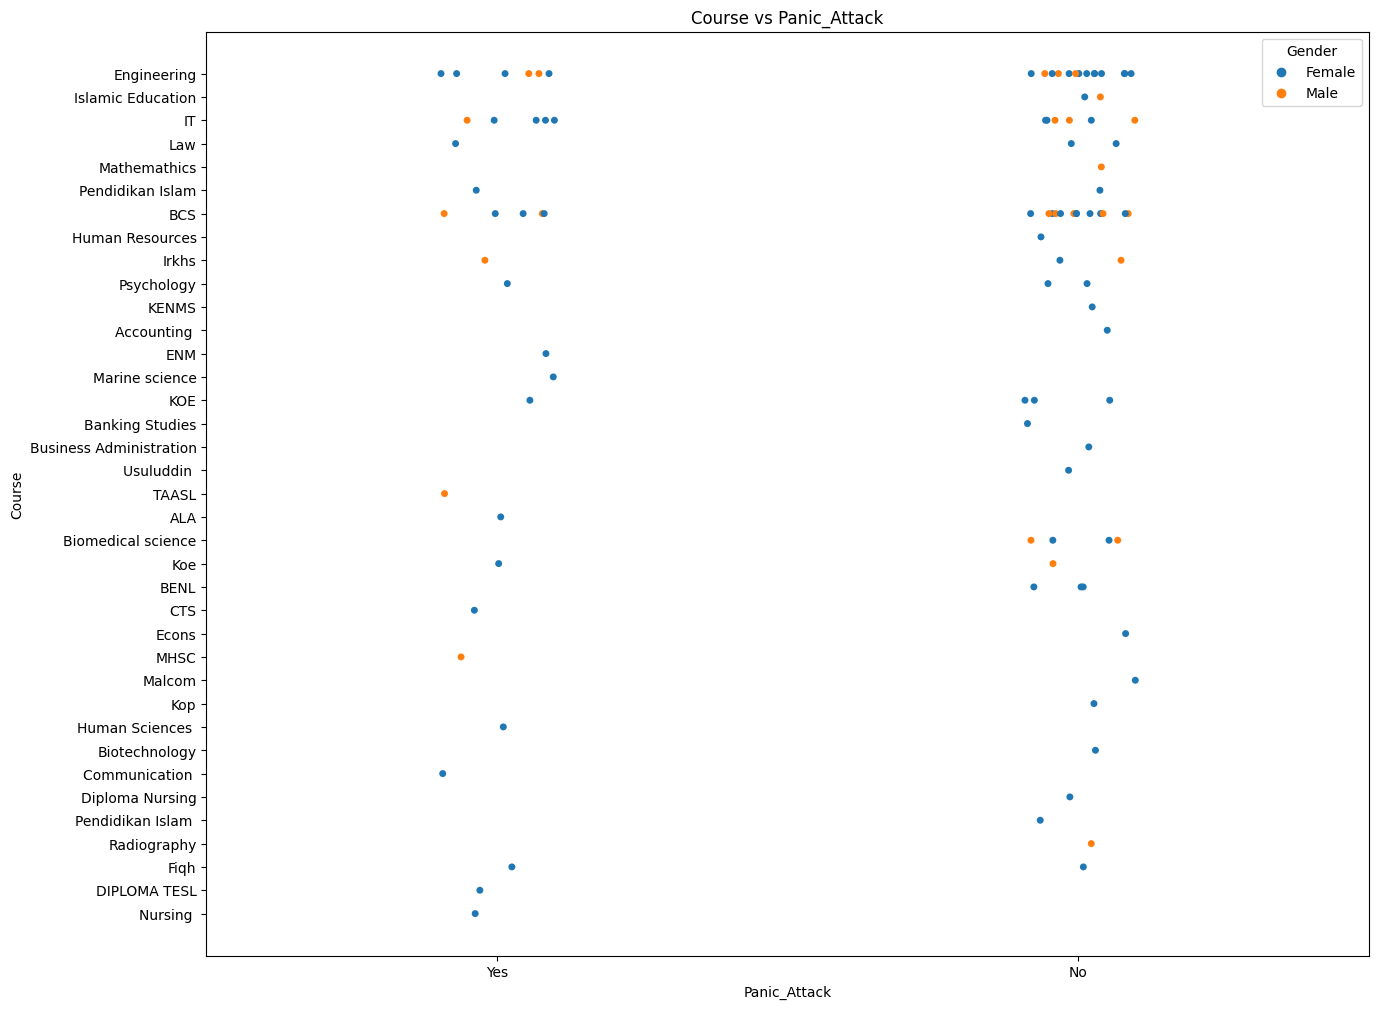

In [32]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='Panic_Attack',y='Course',data=df,hue='Gender')
plot_2.set_title("Course vs Panic_Attack")

In [33]:
df[df['Panic_Attack']=='Yes']['Course'].value_counts().nlargest(5)

Engineering    6
BCS            5
IT             5
MHSC           1
Fiqh           1
Name: Course, dtype: int64

In [34]:
df[['Gender','Panic_Attack']].value_counts()

Gender  Panic_Attack
Female  No              50
        Yes             25
Male    No              18
        Yes              8
dtype: int64

In [35]:
def problem(dataframe):
    list = ['Depression','Anxiety','Panic_Attack']
    for i in list:
        print(df[['Year',i]].groupby('Year')[i].value_counts())
        print('\n')

problem(df)

Year  Depression
1     No            29
      Yes           14
2     No            16
      Yes           10
3     No            14
      Yes           10
4     No             7
      Yes            1
Name: Depression, dtype: int64


Year  Anxiety
1     No         29
      Yes        14
2     No         16
      Yes        10
3     No         16
      Yes         8
4     No          6
      Yes         2
Name: Anxiety, dtype: int64


Year  Panic_Attack
1     No              29
      Yes             14
2     No              18
      Yes              8
3     No              14
      Yes             10
4     No               7
      Yes              1
Name: Panic_Attack, dtype: int64




<Axes: xlabel='Age', ylabel='count'>

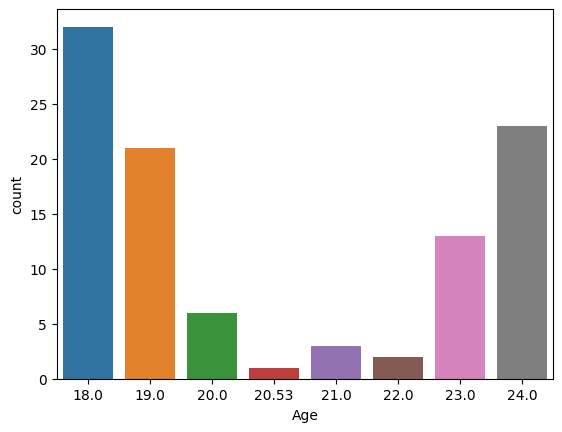

In [36]:
sns.countplot(x='Age',data=df)

In [37]:
df["Age"].value_counts()

18.00    32
24.00    23
19.00    21
23.00    13
20.00     6
21.00     3
22.00     2
20.53     1
Name: Age, dtype: int64

In [38]:
row_idx = df[df['Age']==20.53].index

In [39]:
df.iloc[row_idx]

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
43,8/7/2020 15:07,Male,20.53,IT,1,0 - 1.99,No,No,No,No,No


In [41]:
df_1 = df.drop(row_idx)

In [42]:
from scipy.stats import shapiro
print(df[['Age','Year']].skew())

print("For age :", shapiro(df[['Age']]))

print("For Year :", shapiro(df[['Year']]))

Age     0.378999
Year    0.558130
dtype: float64
For age : ShapiroResult(statistic=0.790394127368927, pvalue=1.1008247785548875e-10)
For Year : ShapiroResult(statistic=0.8191124796867371, pvalue=8.747355062510564e-10)


In [46]:
df_2 = df_1.drop('Date_Time',axis=1)

In [47]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder()

cat_features = df_2.select_dtypes(include=['object']).columns.tolist()

for feature in cat_features:
    df_2[feature] = enc.fit_transform(df_2[feature])

In [48]:
df_2.dtypes

Gender              int64
Age               float64
Course              int64
Year                int64
CGPA                int64
Marital_Status      int64
Depression          int64
Anxiety             int64
Panic_Attack        int64
Treatment           int64
dtype: object

In [49]:
df_2

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,2,1,4,0,0,1,0,0
97,1,18.0,14,2,3,0,1,1,0,0
98,0,19.0,30,3,4,1,1,0,1,0
99,0,23.0,31,4,4,0,0,0,0,0


In [50]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=18d0acc1ff1dfb44430cc844bde2370979ec07cdeedf3fda74647339d803e6cf
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [52]:
def func(dataframe):
    dep = ['Anxiety','Depression','Panic_Attack']
    for d in dep:
        print(f'\n---------{d}--------')
        print(dataframe[['Marital_Status',d]].groupby(d)['Marital_Status'].value_counts())
        print('\n')

func(df_1)


---------Anxiety--------
Anxiety  Marital_Status
No       No                57
         Yes                9
Yes      No                27
         Yes                7
Name: Marital_Status, dtype: int64



---------Depression--------
Depression  Marital_Status
No          No                65
Yes         No                19
            Yes               16
Name: Marital_Status, dtype: int64



---------Panic_Attack--------
Panic_Attack  Marital_Status
No            No                61
              Yes                6
Yes           No                23
              Yes               10
Name: Marital_Status, dtype: int64




In [53]:
df_1

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [54]:
df_final = df_1.drop('Date_Time',axis=1)
df_final.head(1)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No


In [55]:
df_2.sample(2)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
1,1,21.0,20,2,3,0,0,1,0,0
79,0,18.0,14,4,4,0,0,0,0,0


In [56]:
df_2_f = df_2.drop('CGPA',axis=1) # Since CGPA have least or no effect on Treatment seen from PPS and Pearson matrix
df_2_f.columns

Index(['Gender', 'Age', 'Course', 'Year', 'Marital_Status', 'Depression',
       'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [57]:
x = df_2_f.drop('Treatment',axis=1)
y = df_2_f['Treatment']

In [58]:
df_2_f.to_excel('Encoded_excel.xlsx')

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [61]:
os=RandomOverSampler(random_state=42)
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 75, 1: 5})
The number of classes after fit Counter({0: 75, 1: 75})


In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada_ovr = AdaBoostClassifier(n_estimators=300,learning_rate=0.25)
ada_ovr.fit(X_train_os,Y_train_os)

y_pred_ovr = ada_ovr.predict(X_test)
print(classification_report(Y_test,y_pred_ovr))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      1.00      0.67         1

    accuracy                           0.95        20
   macro avg       0.75      0.97      0.82        20
weighted avg       0.97      0.95      0.96        20



In [63]:
df_final['Treatment'].value_counts()

No     94
Yes     6
Name: Treatment, dtype: int64

In [64]:
x_data = df_final.drop('Treatment',axis=1)
y_data = df_final[['Treatment']]

In [65]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state = 20)

In [66]:
categorical_columns = x_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'Course',
 'CGPA',
 'Marital_Status',
 'Depression',
 'Anxiety',
 'Panic_Attack']

In [67]:
y_data.value_counts()

Treatment
No           94
Yes           6
dtype: int64

In [72]:
!pip3 install catboost
from catboost import CatBoostClassifier


cat_1 = CatBoostClassifier(class_weights={'No':0.2,'Yes':0.8})
cat_1.fit(x_train,y_train,cat_features=categorical_columns)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00
Learning rate set to 0.003504
0:	learn: 0.6898980	total: 49.3ms	remaining: 49.3s
1:	learn: 0.6876852	total: 51.7ms	remaining: 25.8s
2:	learn: 0.6841505	total: 54.1ms	remaining: 18s
3:	learn: 0.6818839	total: 58ms	remaining: 14.4s
4:	learn: 0.6773608	total: 60.1ms	remaining: 12s
5:	learn: 0.6734310	total: 62.1ms	remaining: 10.3s
6:	learn: 0.6695741	total: 64.6ms	remaining: 9.16s
7:	learn: 0.6662317	total: 68.7ms	remaining: 8.52s
8:	learn: 0.6625625	total: 71ms	remaining: 7.82s
9:	learn: 0.6589396	total: 73.5ms	remaining: 7.28s
10:	learn: 0.6552923	total: 76.7ms	remaining: 6.89s
11:	learn: 0.6512614	total: 79.6ms	remaining: 6.55s
12:	learn: 0.6477291	total: 82.1ms	remaining: 6.23s
13:	learn: 0.6445321	total: 85.9ms	remaining: 6.05s
14:	learn: 0.6406315	total: 89.5ms	remaining: 5.88s
15:	learn: 0.6371841	total: 92.5ms	remaining: 5.69s
16:	learn: 0.6336574	total: 94.1ms	remaining: 5.44s
17:	learn: 0.6302894	tot

In [73]:
categorical_columns = x_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'Course',
 'CGPA',
 'Marital_Status',
 'Depression',
 'Anxiety',
 'Panic_Attack']

In [74]:
y_data.value_counts()

Treatment
No           94
Yes           6
dtype: int64

In [75]:
from catboost import CatBoostClassifier

cat_1 = CatBoostClassifier(class_weights={'No':0.2,'Yes':0.8})
cat_1.fit(x_train,y_train,cat_features=categorical_columns)

Learning rate set to 0.003504
0:	learn: 0.6898980	total: 6.75ms	remaining: 6.74s
1:	learn: 0.6876852	total: 8.46ms	remaining: 4.22s
2:	learn: 0.6841505	total: 12.3ms	remaining: 4.1s
3:	learn: 0.6818839	total: 15ms	remaining: 3.73s
4:	learn: 0.6773608	total: 17.5ms	remaining: 3.47s
5:	learn: 0.6734310	total: 19.8ms	remaining: 3.28s
6:	learn: 0.6695741	total: 22.7ms	remaining: 3.23s
7:	learn: 0.6662317	total: 26.6ms	remaining: 3.29s
8:	learn: 0.6625625	total: 29.9ms	remaining: 3.29s
9:	learn: 0.6589396	total: 33.8ms	remaining: 3.34s
10:	learn: 0.6552923	total: 37ms	remaining: 3.33s
11:	learn: 0.6512614	total: 41.9ms	remaining: 3.45s
12:	learn: 0.6477291	total: 44.6ms	remaining: 3.39s
13:	learn: 0.6445321	total: 48.8ms	remaining: 3.44s
14:	learn: 0.6406315	total: 51.9ms	remaining: 3.4s
15:	learn: 0.6371841	total: 53.1ms	remaining: 3.27s
16:	learn: 0.6336574	total: 54.5ms	remaining: 3.15s
17:	learn: 0.6302894	total: 56.1ms	remaining: 3.06s
18:	learn: 0.6272941	total: 57.2ms	remaining: 2.95

In [76]:
y_pred_1 = cat_1.predict(x_test)

print(classification_report(y_test,y_pred_1,zero_division=1))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97        19
         Yes       1.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.97      0.50      0.49        20
weighted avg       0.95      0.95      0.93        20



In [77]:
df_2_f['Panic_Attack'].value_counts()

0    67
1    33
Name: Panic_Attack, dtype: int64

In [78]:
x_pa = df_2_f.drop('Panic_Attack',axis=1)
y_pa = df_2_f['Panic_Attack']

In [79]:
x_pa_train,x_pa_test,y_pa_train,y_pa_test = train_test_split(x_pa,y_pa,test_size=0.2,random_state=20)

In [80]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [81]:
models = {

    RandomForestClassifier : RandomForestClassifier(),
    DecisionTreeClassifier : DecisionTreeClassifier(),
    XGBClassifier : XGBClassifier(),
    CatBoostClassifier : CatBoostClassifier()

}


for i in range(len(list(models))):
    class_models = list(models.values())[i]
    class_models.fit(x_pa_train,y_pa_train)


    y_test_pred = class_models.predict(x_pa_test)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_pa_test, y_test_pred)
    model_test_f1 = f1_score(y_pa_test, y_test_pred,average='weighted')
    model_test_precision = precision_score(y_pa_test, y_test_pred)
    model_test_recall = recall_score(y_pa_test, y_test_pred)
    # classification_rep = classification_report(y_pa_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Test Set")
    print("Accuracy : {:.4f}".format(model_test_accuracy))
    print("F1_score : {:.4f}".format(model_test_f1))
    print("Precision : {:.4f}".format(model_test_precision))
    print("Recall : {:.4f}".format(model_test_recall))
    # print("Classifcatiom Report :", classification_rep)

    print(' ======================================================== ')
    print('\n')

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model Performance for Test Set
Accuracy : 0.3500
F1_score : 0.3251
Precision : 0.3333
Recall : 0.1818


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model Performance for Test Set
Accuracy : 0.1000
F1_score : 0.1000
Precision : 0.1111
Recall : 0.0909


<class 'xgboost.sklearn.XGBClassifier'>
Model Performance for Test Set
Accuracy : 0.3000
F1_score : 0.2562
Precision : 0.2000
Recall : 0.0909


Learning rate set to 0.003504
0:	learn: 0.6914534	total: 657us	remaining: 657ms
1:	learn: 0.6898345	total: 1.23ms	remaining: 615ms
2:	learn: 0.6880404	total: 1.52ms	remaining: 507ms
3:	learn: 0.6864207	total: 1.89ms	remaining: 470ms
4:	learn: 0.6850938	total: 3.53ms	remaining: 702ms
5:	learn: 0.6834143	total: 3.91ms	remaining: 647ms
6:	learn: 0.6817131	total: 8.59ms	remaining: 1.22s
7:	learn: 0.6802900	total: 15.3ms	remaining: 1.89s
8:	learn: 0.6788793	total: 15.9ms	remaining: 1.75s
9:	learn: 0.6771641	total: 16.5ms	remaining: 1.

In [82]:
cat_2 = CatBoostClassifier()
cat_2.fit(x_pa_train,y_pa_train)

y_pred_rs = cat_2.predict(x_pa_test)
print(accuracy_score(y_pa_test,y_pred_rs))
print(f1_score(y_pa_test,y_pred_rs,average='weighted'))

Learning rate set to 0.003504
0:	learn: 0.6914534	total: 837us	remaining: 837ms
1:	learn: 0.6898345	total: 1.91ms	remaining: 952ms
2:	learn: 0.6880404	total: 2.65ms	remaining: 881ms
3:	learn: 0.6864207	total: 3.49ms	remaining: 870ms
4:	learn: 0.6850938	total: 4.44ms	remaining: 883ms
5:	learn: 0.6834143	total: 5.33ms	remaining: 884ms
6:	learn: 0.6817131	total: 6.18ms	remaining: 877ms
7:	learn: 0.6802900	total: 7.03ms	remaining: 872ms
8:	learn: 0.6788793	total: 7.72ms	remaining: 850ms
9:	learn: 0.6771641	total: 8.48ms	remaining: 839ms
10:	learn: 0.6749893	total: 9.4ms	remaining: 846ms
11:	learn: 0.6734288	total: 10.3ms	remaining: 846ms
12:	learn: 0.6719666	total: 11.2ms	remaining: 850ms
13:	learn: 0.6703401	total: 12.1ms	remaining: 850ms
14:	learn: 0.6692449	total: 12.9ms	remaining: 848ms
15:	learn: 0.6679860	total: 13.5ms	remaining: 831ms
16:	learn: 0.6665610	total: 14.4ms	remaining: 833ms
17:	learn: 0.6649873	total: 15.2ms	remaining: 831ms
18:	learn: 0.6633718	total: 16.2ms	remaining: 